# EDA ,Preprocessing and Model Building on Space Titanic Dataset

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

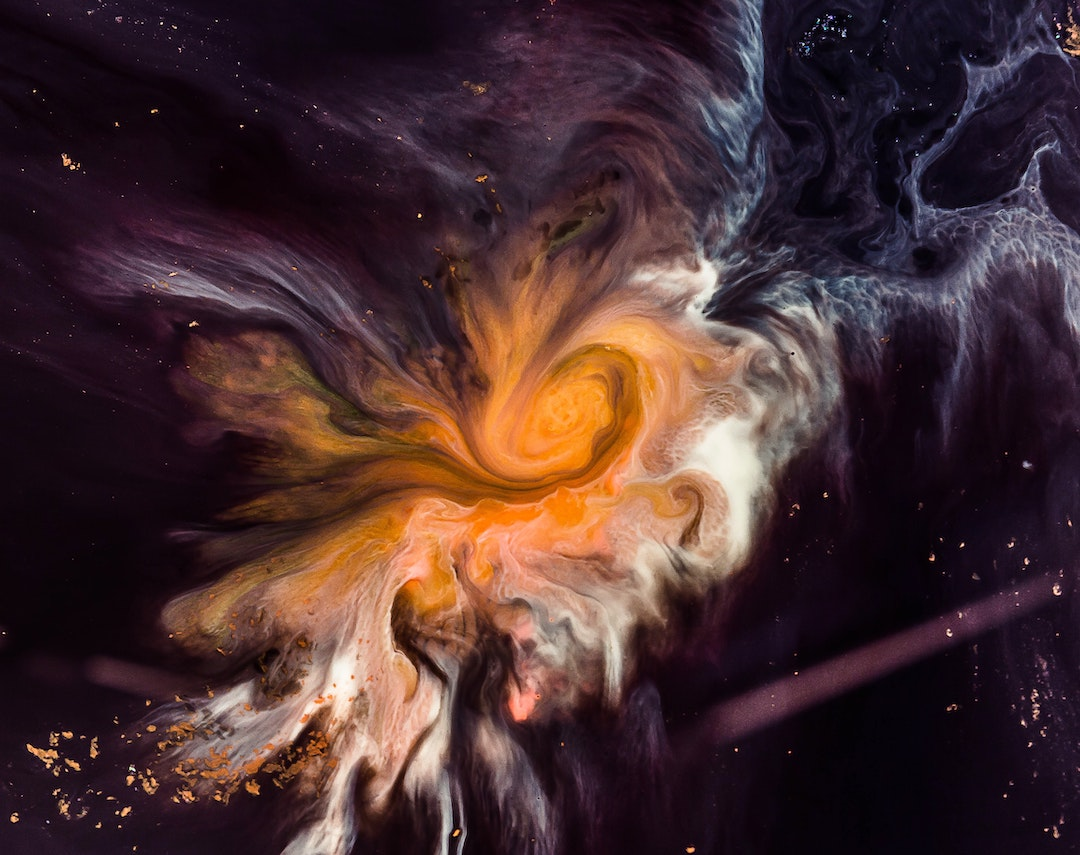

In [2]:
from IPython import display
display.Image(r"C:\Users\Shahid\Desktop\joel-filipe-QwoNAhbmLLo-unsplash.jpg")

### Task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly.

1.PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

2.HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

3.CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

4.Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

5.Destination - The planet the passenger will be debarking to.

6.Age - The age of the passenger.

7.VIP - Whether the passenger has paid for special VIP service during the voyage.

8.RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

9.Name - The first and last names of the passenger.

10.Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [1]:
#loading the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#Importing the dataset
traindata=pd.read_csv(r"C:\Users\Shahid\Desktop\Titanicspaceship\train.csv")
testdata=pd.read_csv(r"C:\Users\Shahid\Desktop\Titanicspaceship\test.csv")

## Data profiling

In [3]:
#Checking the structure of the train data set with first 10 tuples
traindata.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [4]:
#Checking the structure of the test dataset with first 10 tuples
testdata.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
5,0027_01,Earth,False,F/7/P,TRAPPIST-1e,31.0,False,0.0,1615.0,263.0,113.0,60.0,Karlen Ricks
6,0029_01,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,NaN,0.0,0.0,0.0,Aldah Ainserfle
7,0032_01,Europa,True,D/0/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry
8,0032_02,Europa,True,D/0/S,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Dhena Pringry
9,0033_01,Earth,False,F/7/S,55 Cancri e,24.0,False,0.0,639.0,0.0,0.0,0.0,Eliana Delazarson


In [5]:
#Checking the shape of both the train and test datasets
print(f"Train Data Shape: {traindata.shape}")
print(f"Test Data shape: {testdata.shape}")

Train Data Shape: (8693, 14)
Test Data shape: (4277, 13)


In [6]:
#Checking the columns in the dataset
traindata.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [7]:
#Checking the raw informations of diffirent attributes of the dataset
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
traindata["HomePlanet"].dtypes

dtype('O')

In [9]:
#Extracting all the attributes of the dataset
[ft for ft in traindata.columns ]

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name',
 'Transported']

In [10]:
#Organizing the attributes based on their type ,i.e, Numerical attribute and Categorical attribute
cat_col=[ft for ft in traindata.columns if traindata[ft].dtypes=="O"]
num_col=[ft for ft in traindata.columns if traindata[ft].dtypes!="O"]

In [11]:
cat_col,num_col

(['PassengerId',
  'HomePlanet',
  'CryoSleep',
  'Cabin',
  'Destination',
  'VIP',
  'Name'],
 ['Age',
  'RoomService',
  'FoodCourt',
  'ShoppingMall',
  'Spa',
  'VRDeck',
  'Transported'])

In [12]:
#Getting the first 10 tuples of dataset, with just the numerical attributes
traindata[num_col].head(10)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,39.0,0.0,0.0,0.0,0.0,0.0,False
1,24.0,109.0,9.0,25.0,549.0,44.0,True
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False
4,16.0,303.0,70.0,151.0,565.0,2.0,True
5,44.0,0.0,483.0,0.0,291.0,0.0,True
6,26.0,42.0,1539.0,3.0,0.0,0.0,True
7,28.0,0.0,0.0,0.0,0.0,NaN,True
8,35.0,0.0,785.0,17.0,216.0,0.0,True
9,14.0,0.0,0.0,0.0,0.0,0.0,True


In [13]:
#Getting the first 10 tuples of dataset, with just the categorical attributes
traindata[cat_col].head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,False,Sandie Hinetthews
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,False,Billex Jacostaffey
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,False,Candra Jacostaffey
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,False,Andona Beston
9,0008_01,Europa,True,B/1/P,55 Cancri e,False,Erraiam Flatic


In [14]:
#Getting the correlation of all the numerical attributes with each other
traindata[num_col].corr().T

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


In [15]:
#Checking the total number of null values carried by each attributes
traindata.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [16]:
#Getting the # of distinct values ecarried by each attributes
traindata.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [17]:
#Getting the total number of duplicate tuples
traindata.duplicated().sum()

0

## Statistical Profiling

In [18]:
#Getting the correlation of all the numerical attributes with each other
traindata[num_col].corr().T

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


In [19]:
#Getting the stats of all the numeric attributes
traindata.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [20]:
#Getting the covariance of the attributes with each other
traindata.cov().T

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,209.931742,667.123043,3.050663e+03,292.610758,2.035776e+03,1.682397e+03,-0.543541
RoomService,667.123043,444512.442060,-1.703679e+04,21841.552378,7.682342e+03,-1.499138e+04,-81.544744
FoodCourt,3050.662559,-17036.793449,2.596898e+06,-13893.869706,4.126922e+05,4.230100e+05,37.522229
ShoppingMall,292.610758,21841.552378,-1.389387e+04,365657.806887,9.619279e+03,-5.097138e+03,3.066221
Spa,2035.775669,7682.342445,4.126922e+05,9619.278635,1.292099e+06,1.969211e+05,-125.684445
VRDeck,1682.396832,-14991.381979,4.230100e+05,-5097.137626,1.969211e+05,1.312668e+06,-118.629410
Transported,-0.543541,-81.544744,3.752223e+01,3.066221,-1.256844e+02,-1.186294e+02,0.250016


In [21]:
#Checking the skewness of all the numeric attributes
traindata[num_col].skew()

Age              0.419097
RoomService      6.333014
FoodCourt        7.102228
ShoppingMall    12.627562
Spa              7.636020
VRDeck           7.819732
Transported     -0.014497
dtype: float64

In [22]:
#Getting the mean of all the numeric attributes using another attribute as filter
traindata.groupby("HomePlanet").mean()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
HomePlanet,,,,,,,
Earth,26.068232,136.940209,137.228857,133.872606,142.781701,138.132933,0.423946
Europa,34.419664,145.231981,1503.212950,151.132820,848.055609,875.765998,0.658846
Mars,29.297203,552.897272,54.361999,308.445734,110.221706,47.440698,0.523024


## Data Visualization

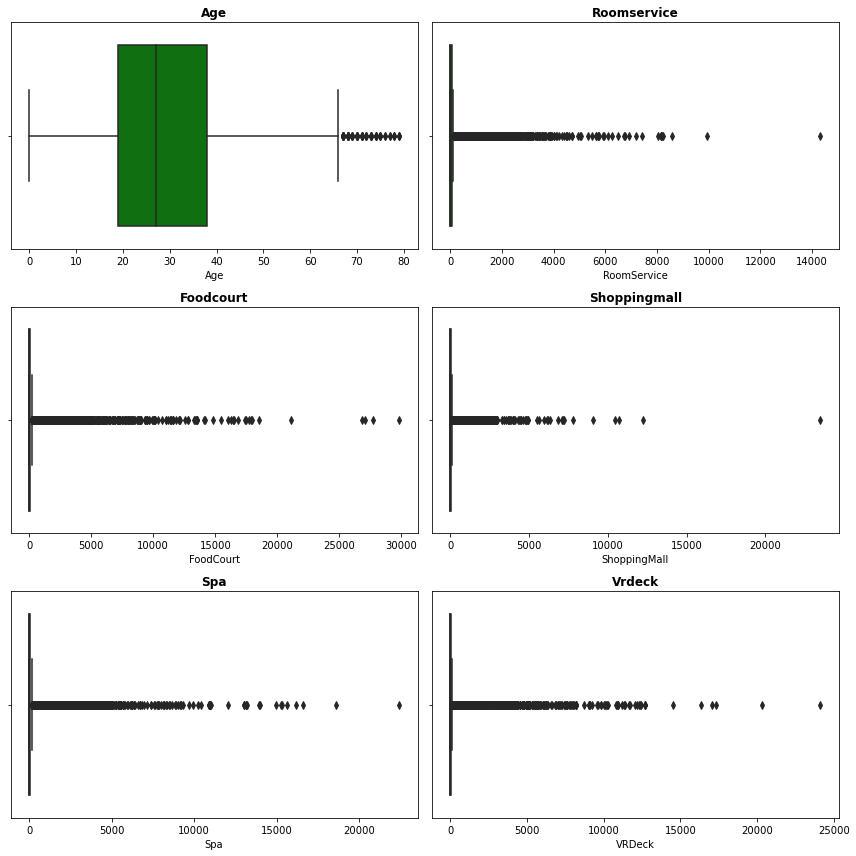

In [23]:
#num_col.remove("Transported")
# for i in num_col:
#     plt.figure(figsize=(5,5))
#     sns.boxplot(traindata[i])
#Plotting all the numeric attributes to detect the outliers
num_list=num_col.remove("Transported")   
target = [i for i in num_col]
plt.figure(figsize=(12,12))
for n,column in enumerate(target):
    plot=plt.subplot(3,2,n+1)
    sns.boxplot(traindata[column],color='green')
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()

In [24]:
cat_list=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

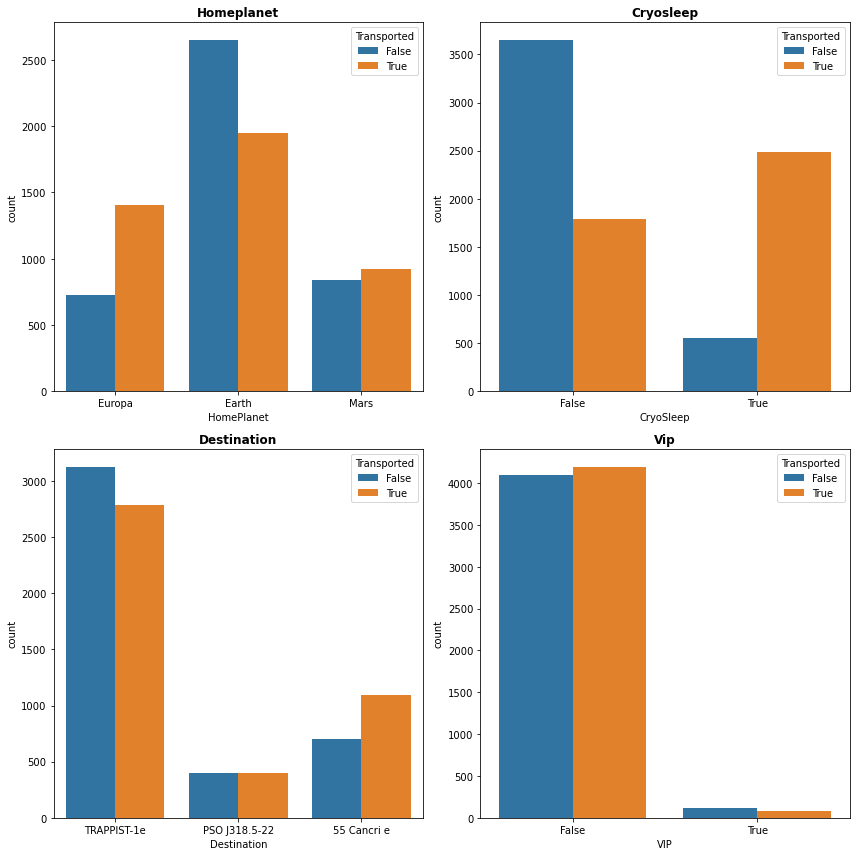

In [25]:
#Using the count plot on all the categorical columns to get some insights.
target = [i for i in cat_list]
plt.figure(figsize=(12,12))
for n,column in enumerate(target):
    plot=plt.subplot(2,2,n+1)
    sns.countplot(traindata[column],hue=traindata.Transported)
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()

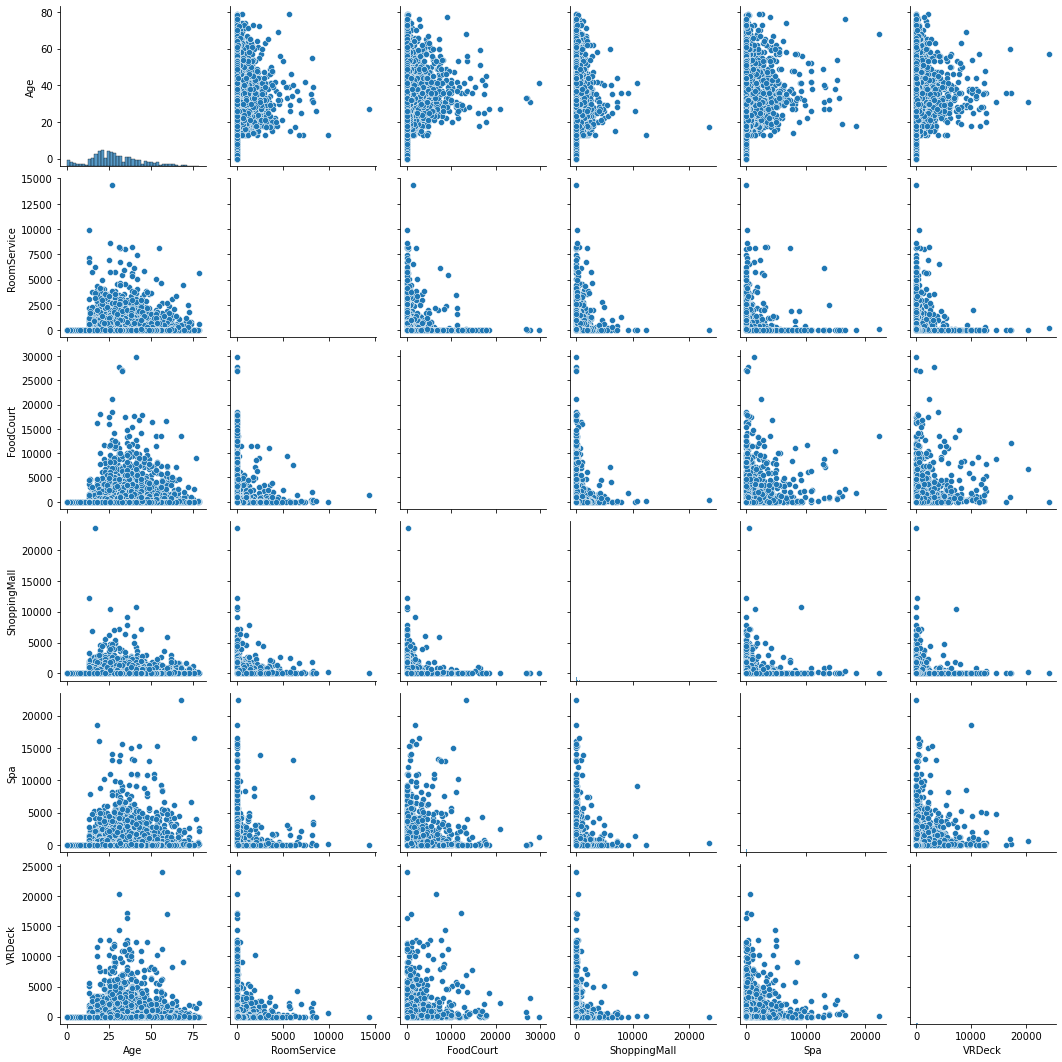

In [26]:
sns.pairplot(traindata[num_col])

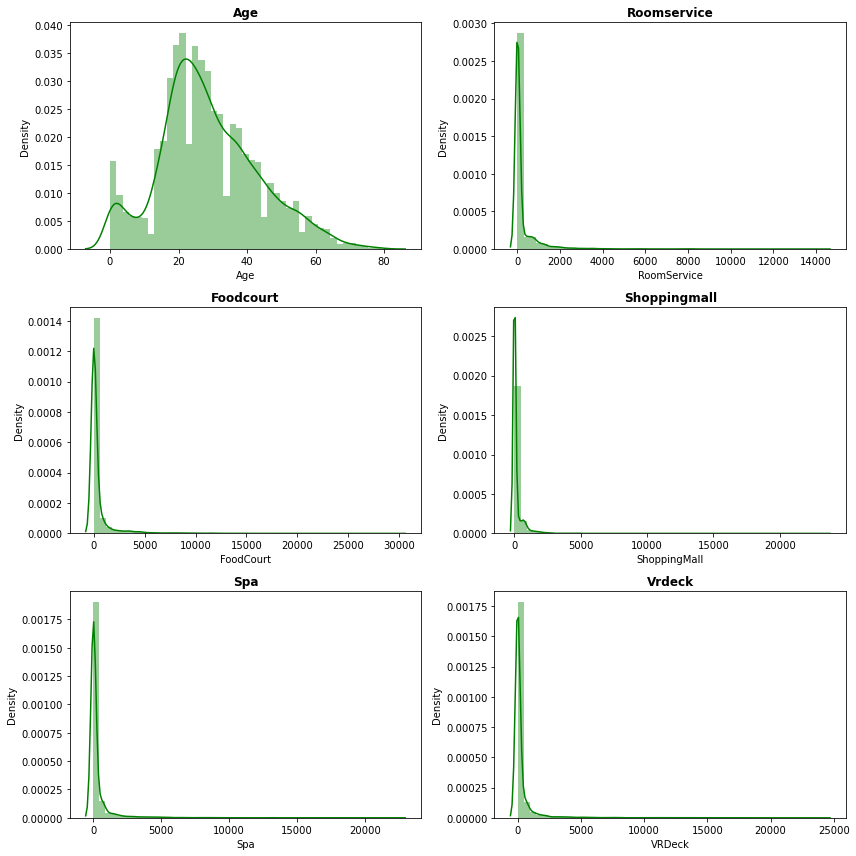

In [27]:
# for i in num_col:
#     plt.figure(figsize=(5,5))
#     sns.distplot(traindata[i])
#Using the distribution plot to check the distribution of all the numeric columns
target = [i for i in num_col]
plt.figure(figsize=(12,12))
for n,column in enumerate(target):
    plot=plt.subplot(3,2,n+1)
    sns.distplot(traindata[column],color='green')
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()

<AxesSubplot:>

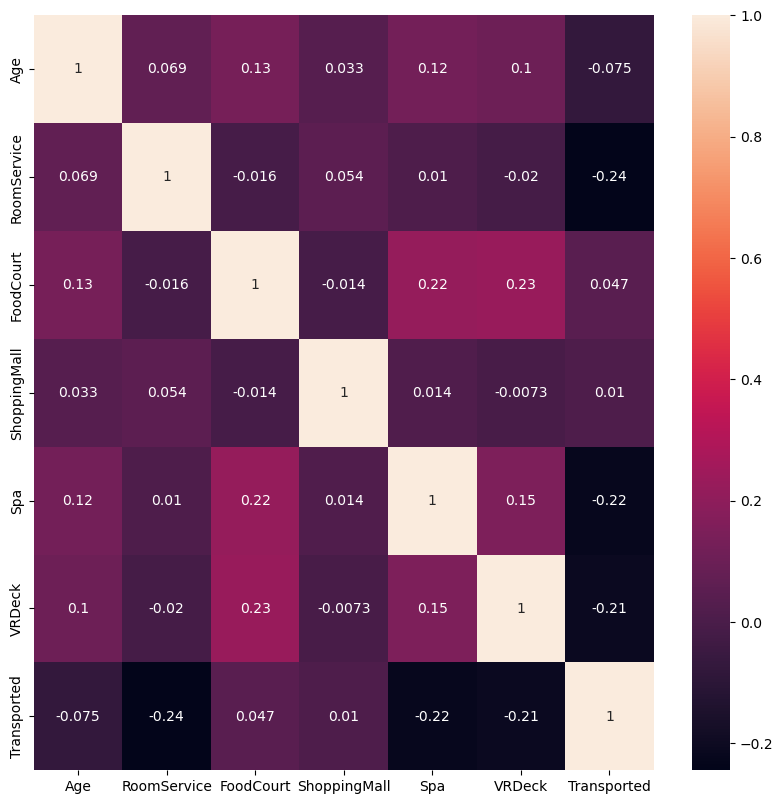

In [28]:
#Correlation plot
plt.figure(figsize=(10,10),dpi=100)
sns.heatmap(traindata.corr(), annot=True)

## PreProcessing


In [29]:

traindata.set_index('PassengerId',inplace=True)
testdata.set_index('PassengerId',inplace=True)

In [30]:
#Missing value 

In [31]:
#To get the total number of missing values in each attribute
traindata.isna().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [32]:
#To get the total number of values for all unique items in an attribute
traindata["HomePlanet"].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [33]:
#Filling the missing values with random value
traindata["HomePlanet"]=traindata["HomePlanet"].fillna("Mars")
testdata["HomePlanet"]=testdata["HomePlanet"].fillna("Mars")

In [34]:
traindata["CryoSleep"]=traindata["CryoSleep"].fillna(False)
traindata["Cabin"]=traindata["Cabin"].fillna("G/556/P")
traindata["Destination"]=traindata["Destination"].fillna("PSO J318.5-22")
traindata["Age"]=traindata["Age"].fillna(traindata["Age"].median())
traindata["VIP"]=traindata["VIP"].fillna(False)
traindata[["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]]=traindata[["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]].fillna(0)

testdata["CryoSleep"]=testdata["CryoSleep"].fillna(False)
testdata["Cabin"]=testdata["Cabin"].fillna("G/556/P")
testdata["Destination"]=testdata["Destination"].fillna("PSO J318.5-22")
testdata["Age"]=testdata["Age"].fillna(traindata["Age"].median())
testdata["VIP"]=testdata["VIP"].fillna(False)
testdata[["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]]=testdata[["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]].fillna(0)

In [35]:
traindata.isnull().sum()

HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [36]:
testdata.isna().sum()

HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
dtype: int64

In [37]:
#Outlier detection


In [38]:
traindata["Age"]=sorted(traindata["Age"])


In [39]:
q1,q3=np.percentile(traindata["Age"],[25,75])
print(q1,q3)
IQR=q3-q1

Lower_fence= q1-(1.5*IQR)                        
Higher_fence= q3+(1.5*IQR)

Lower_fence,Higher_fence

20.0 37.0


(-5.5, 62.5)

In [40]:
traindata[(traindata["Age"]>Higher_fence)|(traindata["Age"]<Lower_fence)]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
9108_02,Earth,False,G/1468/S,TRAPPIST-1e,63.0,False,15.0,7.0,0.0,786.0,0.0,Alvia Shawforden,False
9110_01,Earth,False,F/1866/P,TRAPPIST-1e,63.0,False,0.0,0.0,16.0,3.0,854.0,Ronne Armstromez,False
9111_01,Mars,False,E/598/S,TRAPPIST-1e,63.0,False,1478.0,0.0,631.0,0.0,0.0,Chars Gecre,False
9112_01,Mars,False,D/290/P,TRAPPIST-1e,63.0,False,0.0,0.0,0.0,0.0,0.0,Wealke Brin,False
9114_01,Europa,True,B/348/S,55 Cancri e,63.0,False,0.0,0.0,0.0,0.0,0.0,Phargak Healist,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,A/98/P,55 Cancri e,78.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
9278_01,Earth,True,G/1499/S,PSO J318.5-22,78.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
9279_01,Earth,False,G/1500/S,TRAPPIST-1e,79.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True


In [41]:
#Feature Selection/Reduction

In [42]:
traindata[["Deck","Num","Side"]]=traindata["Cabin"].str.split("/",expand=True)
testdata[["Deck","Num","Side"]]=testdata["Cabin"].str.split("/",expand=True)

<AxesSubplot:xlabel='Deck', ylabel='count'>

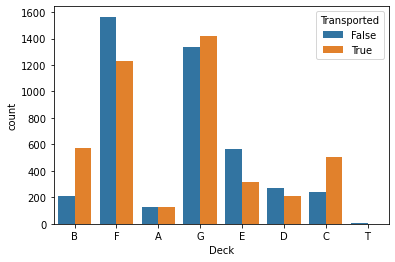

In [43]:
sns.countplot(traindata.Deck,hue=traindata.Transported)

<AxesSubplot:xlabel='Side', ylabel='count'>

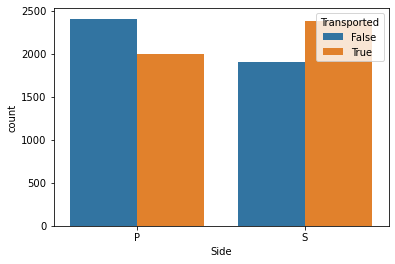

In [44]:
sns.countplot(traindata.Side,hue=traindata.Transported)

In [45]:
Totalcharge=["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
traindata["TotalCharge"]=traindata[Totalcharge].sum(axis=1)
testdata["TotalCharge"]=testdata[Totalcharge].sum(axis=1)

In [47]:
traindata=traindata.drop(columns=["Cabin","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","Name"])
testdata=testdata.drop(columns=["Cabin","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","Name"])

In [48]:
traindata

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Deck,Num,Side,TotalCharge
PassengerId,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,0.0,False,False,B,0,P,0.0
0002_01,Earth,False,TRAPPIST-1e,0.0,False,True,F,0,S,736.0
0003_01,Europa,False,TRAPPIST-1e,0.0,True,False,A,0,S,10383.0
0003_02,Europa,False,TRAPPIST-1e,0.0,False,False,A,0,S,5176.0
0004_01,Earth,False,TRAPPIST-1e,0.0,False,True,F,1,S,1091.0
...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,55 Cancri e,78.0,True,False,A,98,P,8536.0
9278_01,Earth,True,PSO J318.5-22,78.0,False,False,G,1499,S,0.0
9279_01,Earth,False,TRAPPIST-1e,79.0,False,True,G,1500,S,1873.0


In [49]:
#Encoding_CategoricalData

In [50]:
traindata=pd.get_dummies(traindata,columns=["HomePlanet","CryoSleep","VIP","Destination"],drop_first=True)
testdata=pd.get_dummies(testdata,columns=["HomePlanet","CryoSleep","VIP","Destination"],drop_first=True)

In [51]:
traindata['Transported']=traindata['Transported'].replace({True:1,False:0})

In [52]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
target=["Deck","Num","Side"]
for i in target:
    arr=np.concatenate((traindata[i], testdata[i])).astype(str)
    le.fit(arr)
    traindata[i]=le.transform(traindata[i].astype(str))
    testdata[i]=le.transform(testdata[i].astype(str))

<AxesSubplot:>

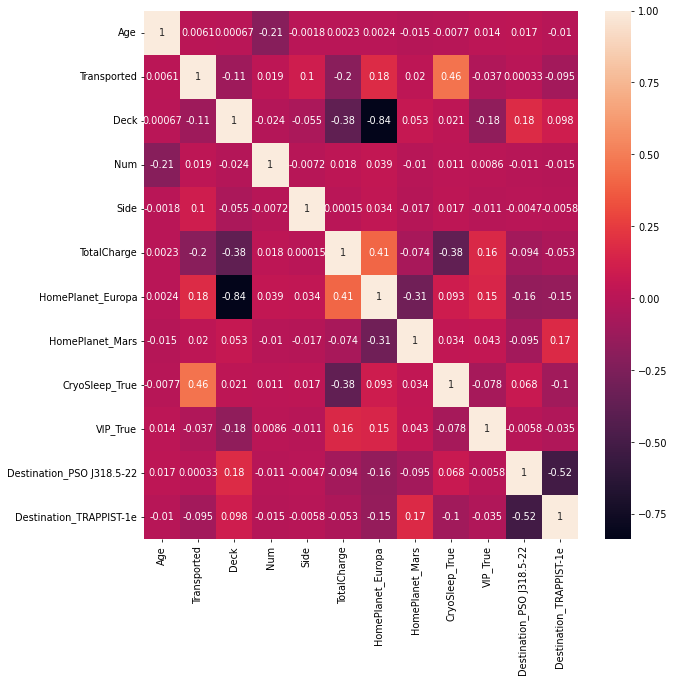

In [53]:
plt.figure(figsize=(10,10),dpi=70)
sns.heatmap(traindata.corr(), annot=True)

In [54]:
#Scaling the data

In [55]:
X=traindata.drop(columns=['Transported'],axis=1)
Y=traindata['Transported']

In [56]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
test=scaler.transform(testdata)

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size = 0.2, random_state = 1)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBRFClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import lightgbm

from sklearn.metrics import f1_score

In [60]:
#Tuning the hyper parameters for Randomforest classifier
clf=RandomForestClassifier(n_estimators=1000,
                         criterion='gini',
                         max_depth=12,
                         max_features='log2',
                         min_samples_leaf=1,
                         min_samples_split=5,
                         random_state=1)

In [61]:
# Train Model
clf.fit(x_train,y_train)

# Training set performance
train_pred=clf.predict(x_train)
train_accuracy=f1_score(y_train,train_pred)

#Testing set performance

test_pred=clf.predict(x_test)
test_accuracy=f1_score(y_test,test_pred)


print('Accuracy for Training set is')
print( 100*train_accuracy)
print('----------------------------------')
print('Accuracy for Testing set is')
print( 100*test_accuracy)

Accuracy for Training set is
83.69412864039869
----------------------------------
Accuracy for Testing set is
71.74048658764815


In [62]:
y_pred=clf.predict(test)

In [63]:
testdata

,Age,Deck,Num,Side,TotalCharge,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,VIP_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
PassengerId,,,,,,,,,,,
0013_01,27.0,6,1117,1,0.0,0,0,1,0,0,1
0018_01,19.0,5,1228,1,2832.0,0,0,0,0,0,1
0019_01,31.0,2,0,1,0.0,1,0,1,0,0,0
0021_01,38.0,2,1,1,7418.0,1,0,0,0,0,1
0023_01,20.0,5,1339,1,645.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9266_02,34.0,6,553,1,0.0,0,0,1,0,0,1
9269_01,42.0,6,1402,0,1018.0,0,0,0,0,0,1
9271_01,27.0,3,1113,0,0.0,0,1,1,0,0,0


In [74]:
#Creating the submission file
submission = pd.DataFrame({'Transported':y_pred.astype(bool)}, index = testdata.index)
submission=submission.reset_index()
# submission = pd.DataFrame()
# submission['PassengerId'] = testdata.PassengerId
# submission['Transported'] = y_pred
submission.to_csv('submission1.csv', index=False)

In [75]:
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
